In [1]:
#@title Load libraries
!pip install -q face_recognition
!pip install -q fer
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import matplotlib.patches as patches
%matplotlib inline
import face_recognition
import numpy as np
from PIL import ImageDraw
import PIL.Image
from io import BytesIO
from fer import FER
import cv2
import operator
import time
from google.colab import files
from google.colab.patches import cv2_imshow
detector = FER()

     |████████████████████████████████| 100.2MB 43kB/s 
     |████████████████████████████████| 808kB 9.3MB/s 
     |████████████████████████████████| 2.3MB 50.3MB/s 
Instructions for updating:
non-resource variables are not supported in the long term
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


09-11-2020:20:28:46,854 WARNING  [deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training_v1.py:2070: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


In [2]:
#@title Upload image with faces
uploaded = files.upload() #https://unsplash.com/photos/1qfy-jDc_jo

Saving trump.jpg to trump.jpg


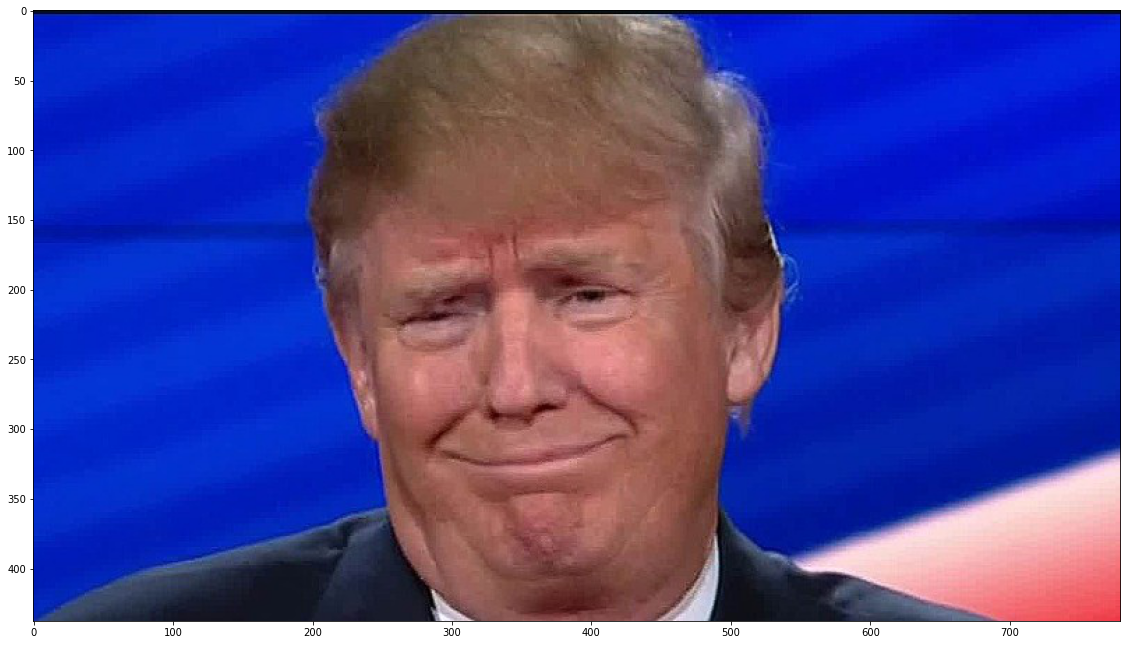

In [3]:
#@title Display image
image = face_recognition.load_image_file(list(uploaded.keys())[0])
boundary = 24
im = PIL.Image.open(list(uploaded.keys())[0])
height = (im.size[1] / im.size[0]) * 20
fig=plt.subplots(figsize=(20,height))
imshow(im)

Number of faces: 1
Time taken: 0.35  seconds


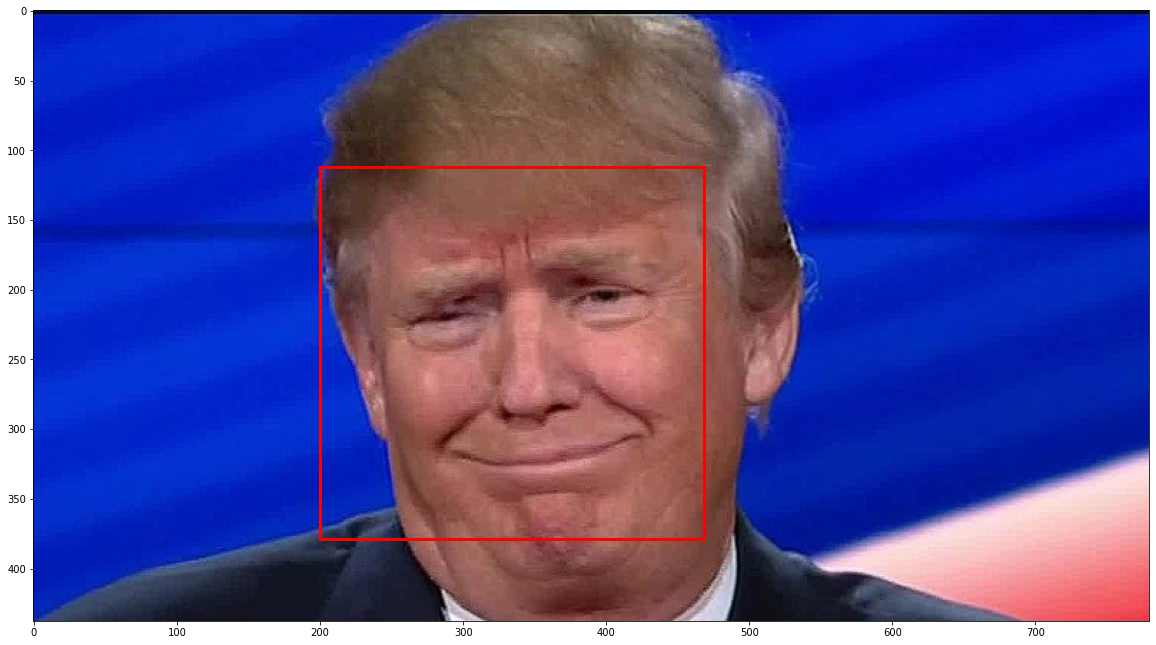

In [4]:
#@title Use 'Face Recognition' library and draw a red box around the faces
start = time.time()
face_locations = face_recognition.face_locations(image)
fig,ax = plt.subplots(figsize=(20,height))
for face_location in face_locations:
    top, right, bottom, left = face_location 
    ax.imshow(im,aspect='auto')
    rect = patches.Rectangle((left,top), (right - left), (bottom-top),linewidth=3,edgecolor='r',facecolor='none')
    ax.add_patch(rect)
end = time.time()
print("Number of faces:",len(face_locations))
print("Time taken:",round(end-start,2)," seconds")

Number of faces: 1
Time taken: 7.3340067863464355  seconds


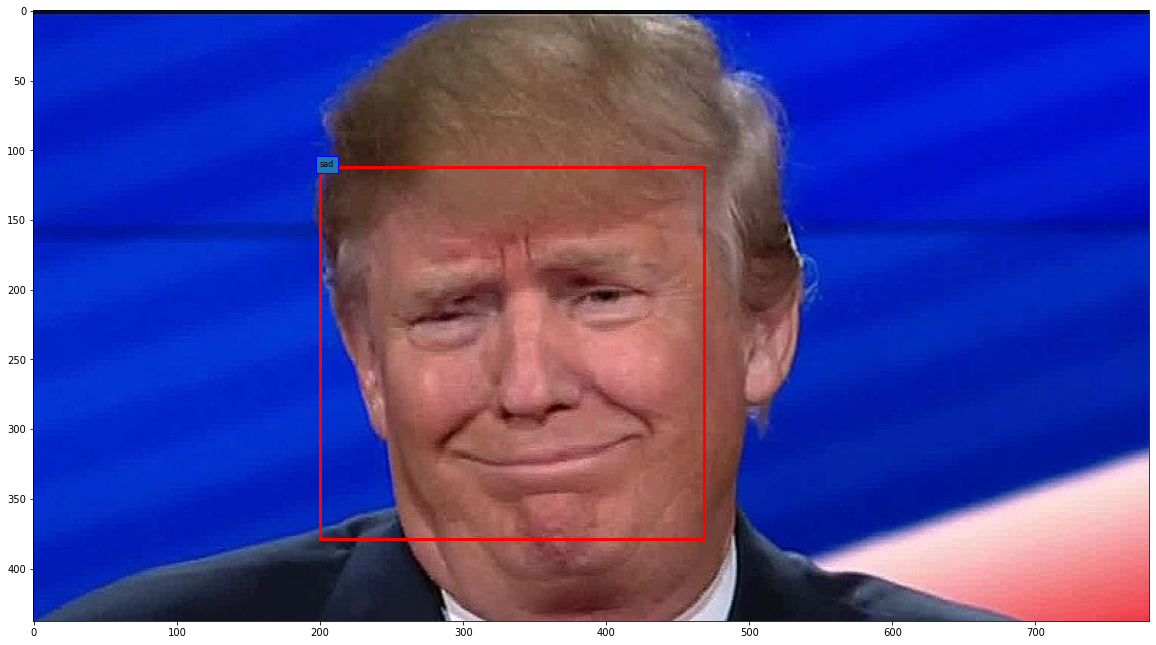

In [5]:
#@title Use 'Face Recognition' library and draw a red box around the faces as well as predicted emotion
start = time.time()
face_locations = face_recognition.face_locations(image)
fig,ax = plt.subplots(figsize=(20,height))
for face_location in face_locations:
    top, right, bottom, left = face_location 
    ax.imshow(im,aspect='auto')
    rect = patches.Rectangle((left,top), (right - left), (bottom-top),linewidth=3,edgecolor='r',facecolor='none')
    ax.add_patch(rect)
    face_image = image[top-boundary:bottom+boundary, left-boundary:right+boundary]
    attribute = detector.detect_emotions(face_image)
    if (not attribute) == False:
      emotion = max(attribute[0]['emotions'].items(),key=operator.itemgetter(1))[0]
      #print(emotion)
      plt.text(left, top, emotion, fontsize=8, bbox=dict(fill=True, edgecolor='blue', linewidth=1))
end = time.time()
print("Number of faces:",len(face_locations))
print("Time taken:",end-start," seconds")

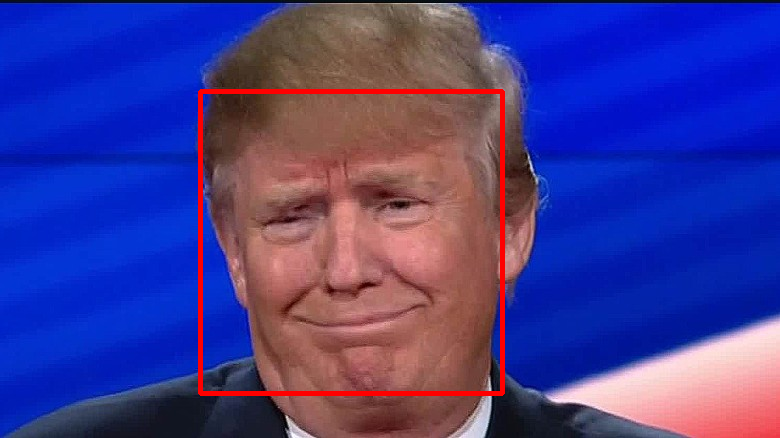

Time taken: 0.3036036491394043  seconds
Number of faces: 1


In [6]:
#@title Use Haar Cascades and draw a red box around the faces
start = time.time()
#Load the cascade
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

#Read the input image
img = cv2.imread(list(uploaded.keys())[0])

#Convert into GrayScale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#Detect Faces
faces = face_cascade.detectMultiScale(gray, 1.3, 4)
#Draw rectangle around each faces
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), 3)
#Display the output
ims = cv2.resize(img,(im.size[0],im.size[1]))
cv2_imshow(ims)
cv2.waitKey()
end = time.time()
print("Time taken:",end-start," seconds")
print("Number of faces:",len(faces))